<a href="https://colab.research.google.com/github/nlei1/nlp-notebooks/blob/main/googlenews_with_most_similar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, pandas as pd 
import os
import zipfile
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
import gensim
import gensim.downloader as api
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [ ]:
# Remember to upload .bin.gz model from laptop first

model = gensim.models.KeyedVectors.load_word2vec_format(
     '/content/GoogleNews-vectors-negative300.bin.gz',
      binary=True,
      limit=int(2E6)
)

In [13]:
url  = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/drugs-side-effects3.csv'
df = pd.read_csv(url, header=None, error_bad_lines=False)
insomnia_drug_names = df[0].tolist()
ind_dct = {k: v for v, k in enumerate(insomnia_drug_names)}

def get_words(drug_name):
  return [incom for incom in df.iloc[ind_dct[drug_name]] if str(incom) != 'nan']

def get_embeddings(words_lst):
  # takes in a name and returns a lst of embeddings of drug and its related words
  embeddings = []
  for item in words_lst:
    embeddings.append(model[item])
  return embeddings

def get_pca(embeddings, n_components):
  pca = PCA(n_components)
  pca_result = pca.fit_transform(embeddings)
  post_pca = pd.DataFrame(pca_result, columns = ['x','y'])
  return post_pca

def get_tsne(embeddings, p_perplexity, p_n_iter, n_components):
  tsne = TSNE(n_components, perplexity=p_perplexity, n_iter=p_n_iter)
  tsne_result = tsne.fit_transform(embeddings)
  post_tsne = pd.DataFrame(tsne_result, columns = ['x','y'])
  return post_tsne

def plot_with_labels(drug_name, pca=True, p_perplexity=1, p_n_iter=1000, n_components=2):
  words_lst = get_words(drug_name)
  embeddings_lst = get_embeddings(words_lst)
  if pca:
    post_reduction = get_pca(embeddings_lst, n_components)
  else:
    post_reduction = get_tsne(embeddings_lst, p_perplexity, p_n_iter, n_components)
  post_reduction_annotated = post_reduction.join(pd.DataFrame(words_lst, columns=['label']))
  title_str = drug_name + (": PCA" if pca else ": TSNE")
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10), title=title_str)
  post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

def plot_insomnia_drugs():
  for drug in insomnia_drug_names:
    plot_with_labels(drug)
    plot_with_labels(drug, False)

def get_similarity_table(n=20):
  result_lst = []
  for drug in insomnia_drug_names:
    result_lst.append(pd.DataFrame(model.most_similar(positive=[drug], topn=n), columns=['name (' + drug + ")", 'similarity (' + drug + ")"]))
  return pd.concat(result_lst, axis=1, join="inner")

def get_effects_table(n=20):
  result_lst = []
  for drug in insomnia_drug_names:
    result_lst.append(pd.DataFrame(model.most_similar(positive=[drug, 'effects'], negative=['medication'], topn=n), columns=['name (' + drug + ")", 'similarity (' + drug + ")"]))
  return pd.concat(result_lst, axis=1, join="inner")

def forms_of_words_analysis():
  forms_of_words_url = 'https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/forms-of-words.csv'
  forms_of_words_df = pd.read_csv(forms_of_words_url, header=None, error_bad_lines=False)
  word_lst = []
  for index, row in forms_of_words_df.iterrows():
    word_lst += (row.dropna()).tolist()
  new_lst = []
  for thing in word_lst:
    if thing in model.wv.vocab:
      new_lst.append(thing)
  embeddings_lst = get_embeddings(new_lst)
  post_reduction = get_tsne(embeddings_lst, p_perplexity=1, p_n_iter=1000, n_components=2)
  post_reduction_annotated = post_reduction.join(pd.DataFrame(new_lst, columns=['label']))
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10), title='TSNE')
  post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)
  post_reduction = get_pca(embeddings_lst, n_components=2)
  post_reduction_annotated = post_reduction.join(pd.DataFrame(new_lst, columns=['label']))
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10), title='PCA')
  post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

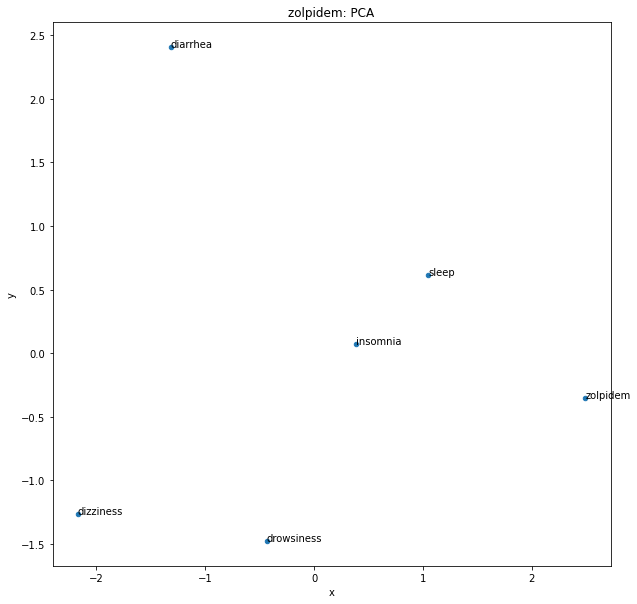

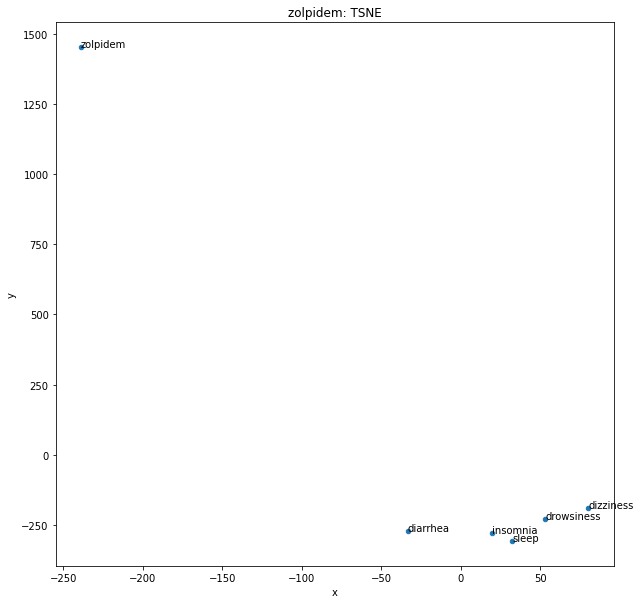

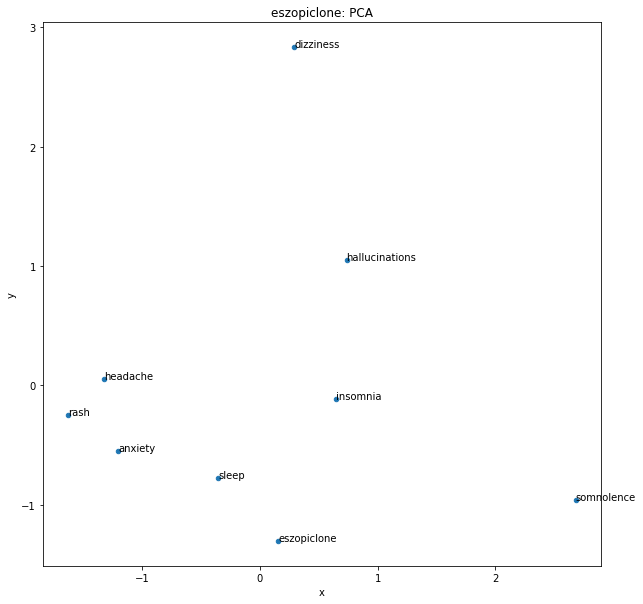

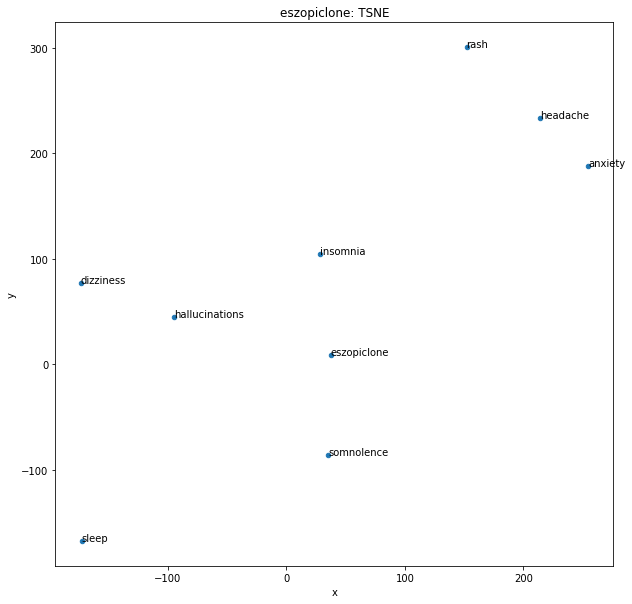

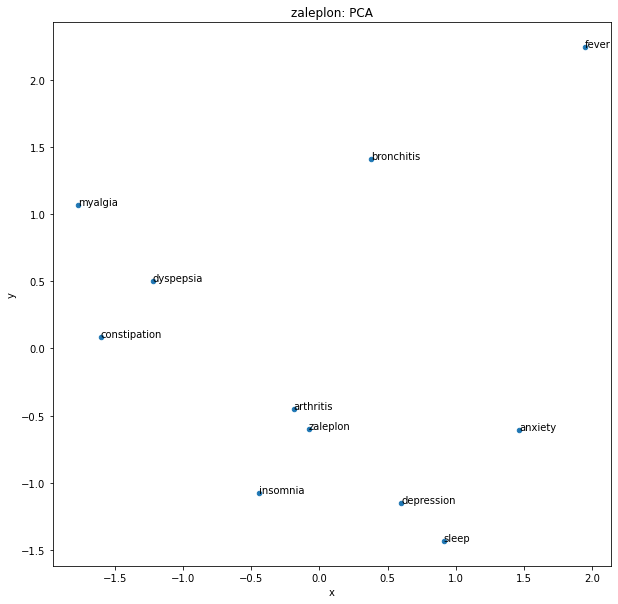

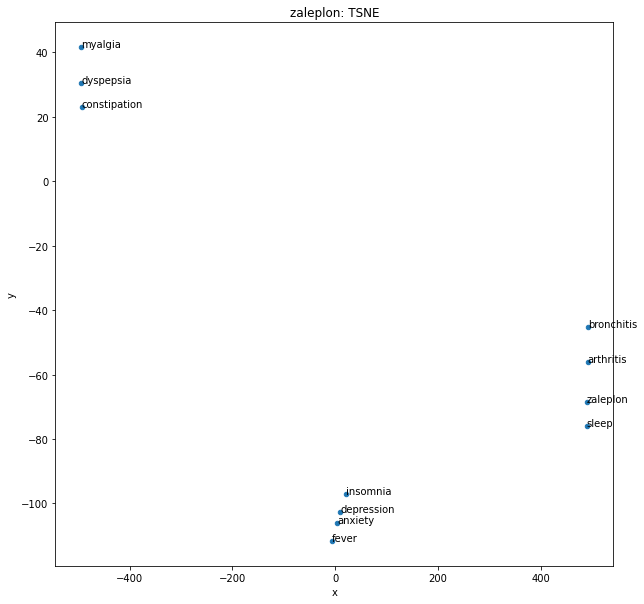

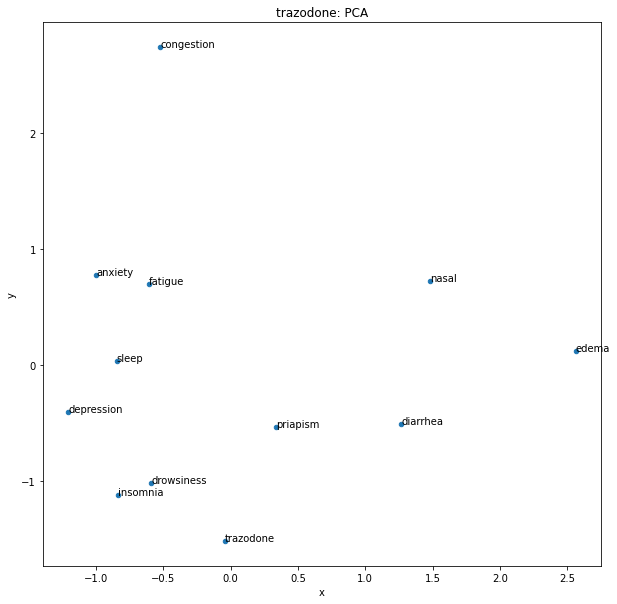

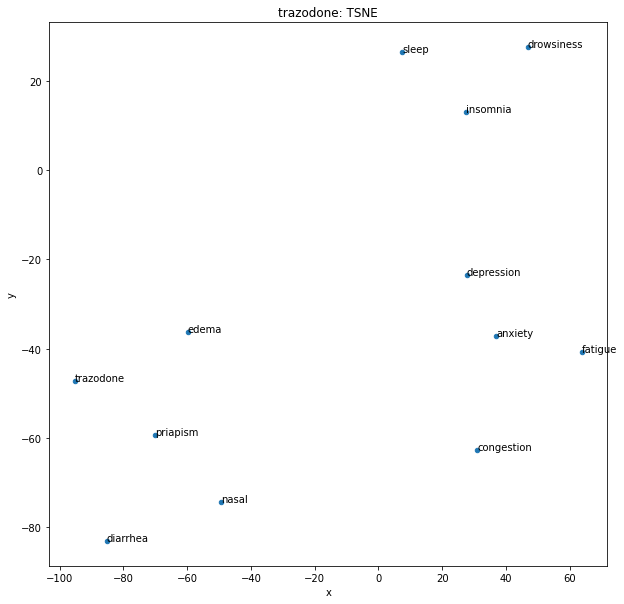

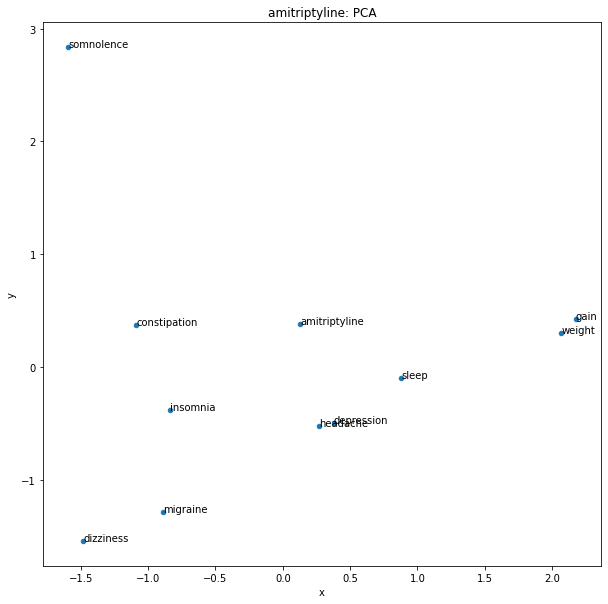

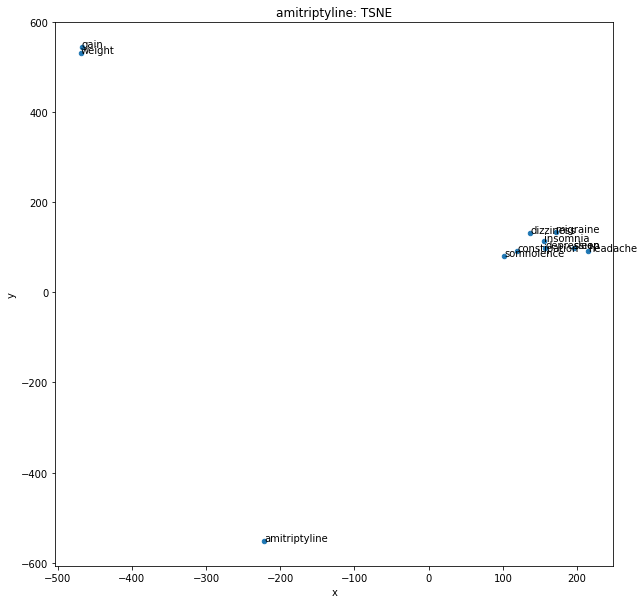

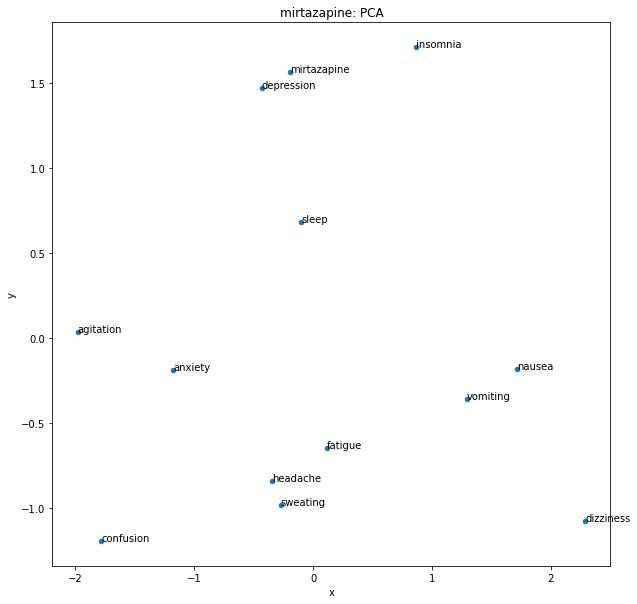

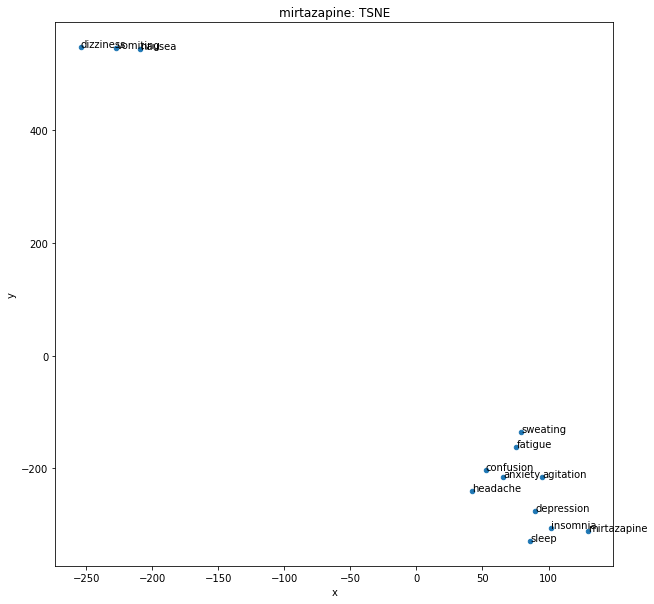

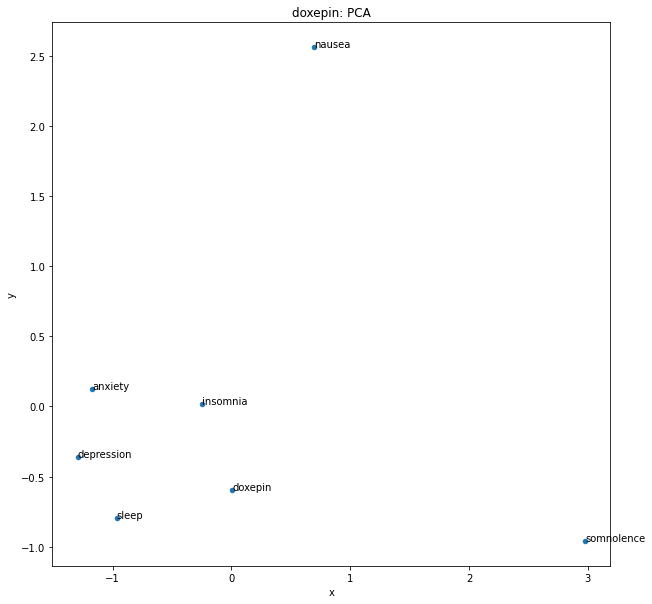

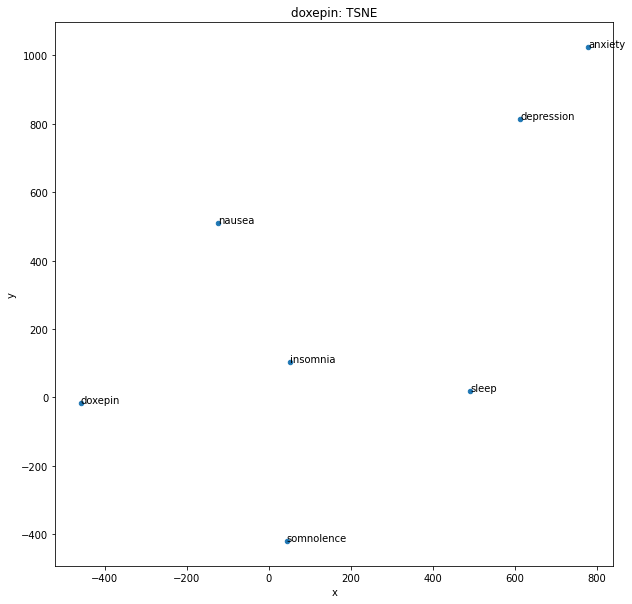

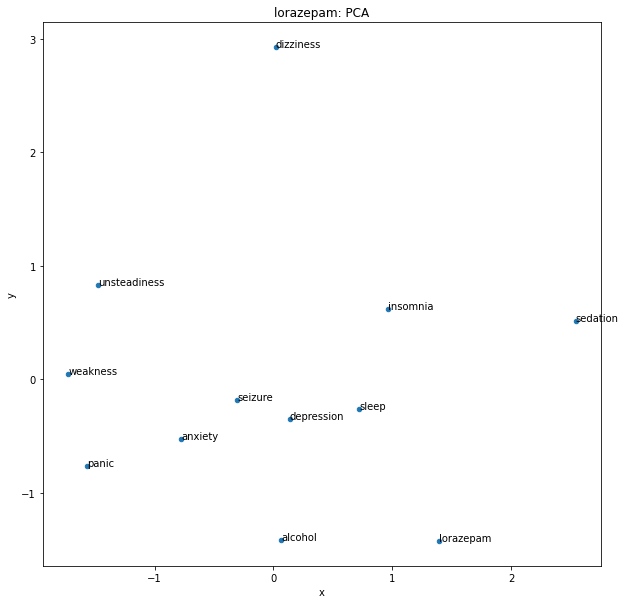

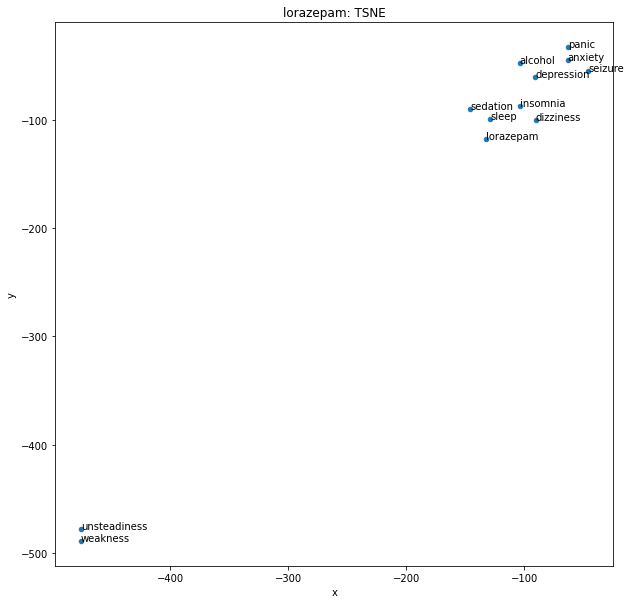

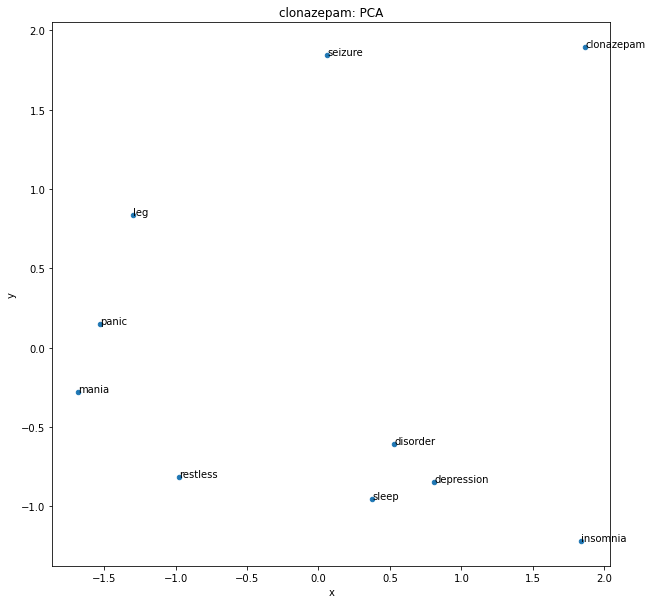

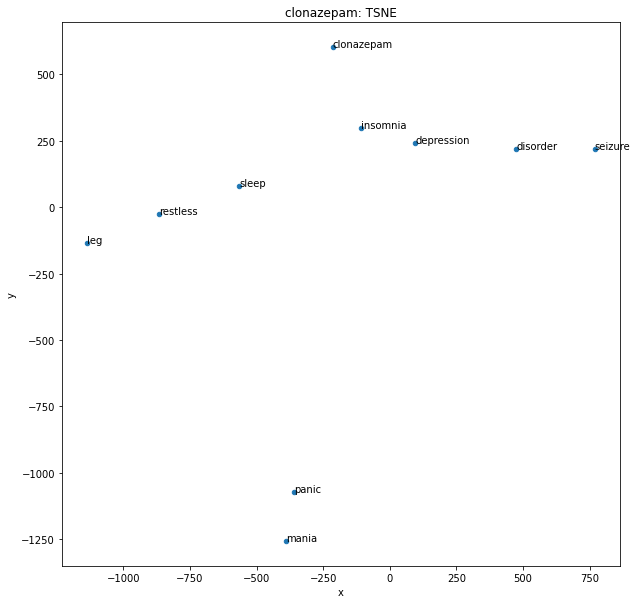

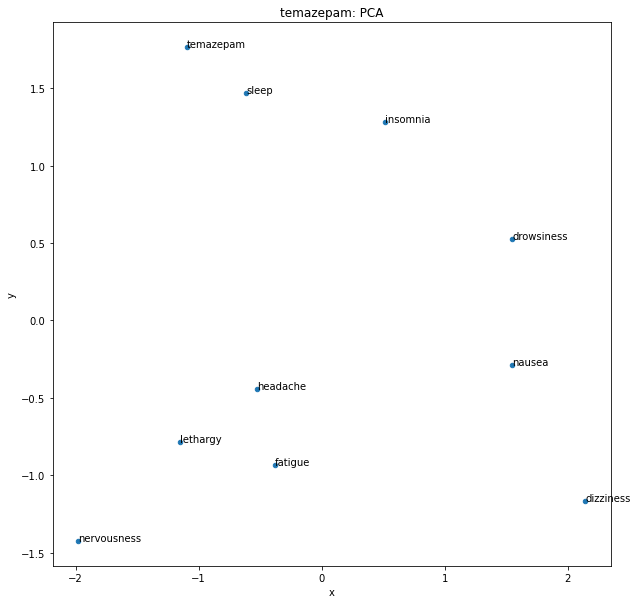

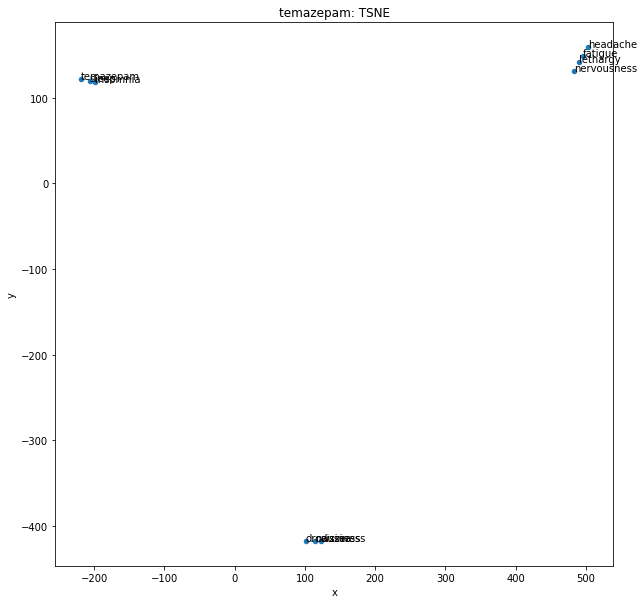

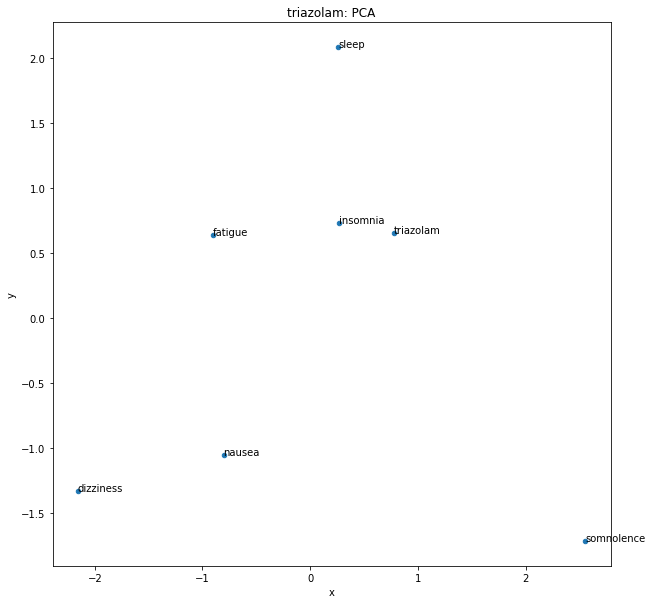

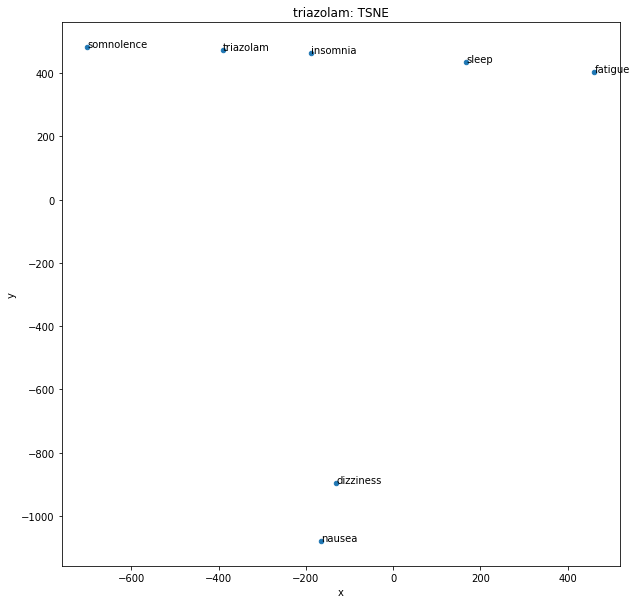

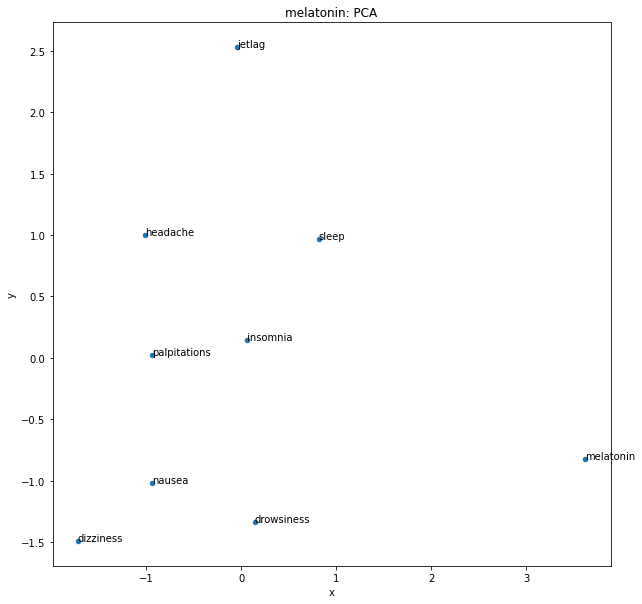

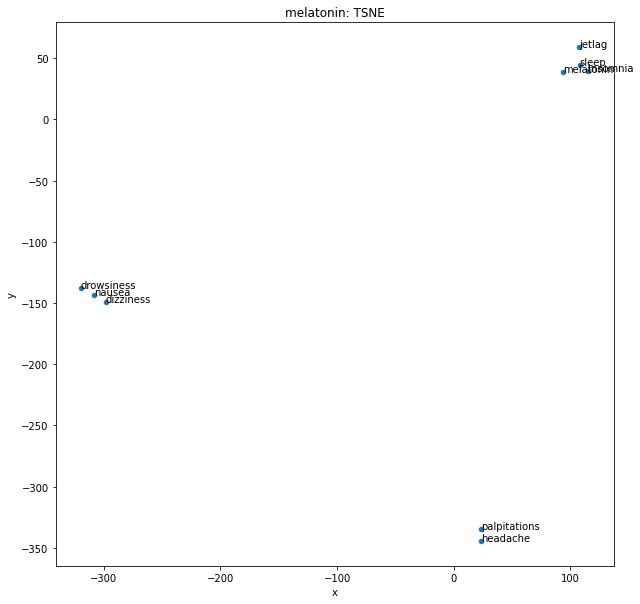

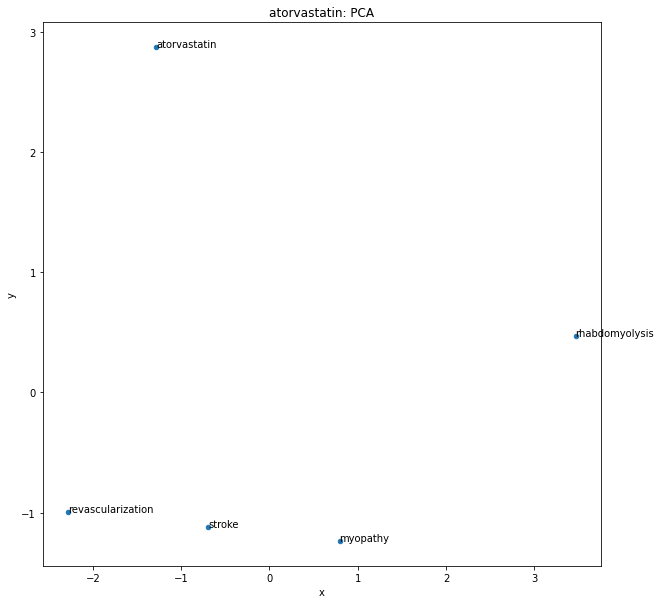

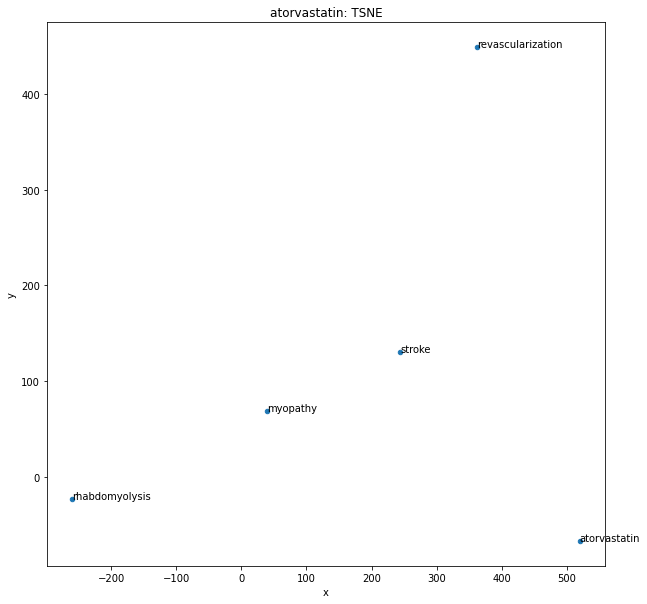

In [ ]:
plot_insomnia_drugs()

In [ ]:
get_similarity_table()

,name (zolpidem),similarity (zolpidem),name (eszopiclone),similarity (eszopiclone),name (zaleplon),similarity (zaleplon),name (trazodone),similarity (trazodone),name (amitriptyline),similarity (amitriptyline),...,name (clonazepam),similarity (clonazepam),name (temazepam),similarity (temazepam),name (triazolam),similarity (triazolam),name (melatonin),similarity (melatonin),name (atorvastatin),similarity (atorvastatin)
0,Zolpidem,0.680573,ramelteon,0.734160,ropinirole,0.724230,antidepressant_trazodone,0.700647,tricyclic_antidepressants,0.708790,...,Alprazolam,0.729731,Temazepam,0.741738,Valium_diazepam,0.713946,hormone_melatonin,0.769957,clopidogrel,0.693777
1,pregabalin,0.630564,desvenlafaxine_succinate,0.731943,zolpidem_tartrate,0.717445,fluvoxamine,0.672600,buspirone,0.703111,...,Clonazepam,0.706718,diazepam_Valium,0.656742,sertraline_Zoloft,0.707703,melatonin_hormone,0.757825,valsartan,0.691374
2,anxiolytic,0.622976,pramipexole,0.719255,topiramate_Topamax,0.713020,##mg_###mg,0.669436,clomipramine,0.696403,...,Diazepam,0.705244,Amitriptyline,0.645025,Midazolam,0.701232,Melatonin,0.739480,rosuvastatin,0.687712
3,ramelteon,0.622422,MIRAPEX,0.711955,sertraline_Zoloft,0.708969,Extended_Release_Tablets,0.667916,tricyclic_antidepressant,0.695767,...,alprazolam_Xanax,0.671512,Phenobarbital,0.634282,cetirizine,0.696453,sleep_hormone_melatonin,0.677241,pioglitazone,0.685841
4,buspirone,0.622256,oxcarbazepine,0.711871,Keppra_XR,0.708616,tramadol_hydrochloride,0.662778,sertraline,0.693304,...,Klonopin,0.668442,oxazepam,0.624725,venlafaxine_Effexor,0.695835,serotonin,0.665822,simvastatin,0.685348
5,pramipexole,0.621216,pregabalin,0.711252,Zaleplon,0.704700,metformin_HCl,0.656135,spironolactone,0.683895,...,Lorazepam,0.662875,Diazepam,0.622719,NUCYNTA_TM,0.695017,neurotransmitter_serotonin,0.615368,Atorvastatin,0.679054
6,eszopiclone,0.617116,ropinirole,0.708876,orally_disintegrating_tablets,0.703003,serotonin_norepinephrine_reuptake_inhibitor,0.654684,clonidine,0.683196,...,diazepam_Valium,0.653661,Zopiclone,0.621437,alprazolam_Xanax,0.694768,circadian_rhythms,0.615242,irbesartan,0.677301
7,scopolamine,0.615032,Circadin,0.704554,selegiline,0.702094,desloratadine,0.653492,oxcarbazepine,0.681575,...,antianxiety_drug,0.649233,anti_depressant_tablets,0.619175,terazosin,0.693787,orexin,0.613426,statin,0.673512
8,dexmedetomidine,0.615032,dexmedetomidine,0.701256,budesonide_inhalation_suspension,0.701030,cyclobenzaprine,0.647267,Venlafaxine,0.678886,...,Xanax,0.646613,Co_proxamol,0.616280,Prilosec_omeprazole,0.687542,melatonin_supplements,0.612142,ramipril,0.671953
9,gabapentin,0.612853,ULORIC,0.699001,prochlorperazine,0.700860,sertraline_Zoloft,0.646296,sertraline_Zoloft,0.678657,...,Xanax_Valium,0.646469,alprazolam_Xanax,0.614241,Flexeril,0.685976,vitamin_D,0.611408,candesartan,0.663704


In [ ]:
get_effects_table()

,name (zolpidem),similarity (zolpidem),name (eszopiclone),similarity (eszopiclone),name (zaleplon),similarity (zaleplon),name (trazodone),similarity (trazodone),name (amitriptyline),similarity (amitriptyline),...,name (clonazepam),similarity (clonazepam),name (temazepam),similarity (temazepam),name (triazolam),similarity (triazolam),name (melatonin),similarity (melatonin),name (atorvastatin),similarity (atorvastatin)
0,effect,0.493540,impacts,0.521380,adverse_effects,0.519883,adverse_effects,0.487558,adverse_effects,0.547232,...,adverse_effects,0.446483,effect,0.469105,adverse_effects,0.519139,hormone_melatonin,0.480198,impacts,0.500691
1,adverse_effects,0.464762,adverse_effects,0.501921,antitumour,0.499287,impacts,0.475212,Effects,0.491897,...,impacts,0.413729,adverse_effects,0.468561,deleterious_effects,0.466626,harmful_effects,0.475837,impact,0.471172
2,deleterious_effects,0.462047,impact,0.487945,Effects,0.466595,harmful_effects,0.457754,effect,0.489327,...,Effects,0.406664,deleterious_effects,0.468025,harmful_effects,0.456299,melatonin_hormone,0.475802,adverse_effects,0.466069
3,impacts,0.458560,effect,0.483845,deleterious_effects,0.461547,effect,0.455442,tricyclic,0.487161,...,effect,0.401099,harmful_effects,0.458617,antitumour,0.439770,adverse_effects,0.468025,effect,0.451880
4,harmful_effects,0.457083,antitumour,0.474386,tricyclic,0.453372,deleterious_effects,0.453564,impacts,0.478732,...,harmful_effects,0.400914,impacts,0.438332,tricyclic,0.439530,impacts,0.452086,harmful_effects,0.440217
5,Effects,0.451216,Effects,0.471344,antitumor_effects,0.447095,impact,0.430324,antitumour,0.467233,...,antitumour,0.392051,impact,0.428329,Effects,0.434787,deleterious_effects,0.438559,Effects,0.426129
6,impact,0.437438,deleterious_effects,0.449887,cannabinor,0.446760,Effects,0.421523,harmful_effects,0.464980,...,deleterious_effects,0.379013,detrimental_effect,0.428003,antitumor_effects,0.434502,antitumour,0.428113,implications,0.425064
7,stimulatory_effects,0.414163,desvenlafaxine_succinate,0.449462,impacts,0.442566,antitumour,0.413158,deleterious_effects,0.459309,...,phenethylamine,0.377901,antitumour,0.409369,nudity_vulgarity,0.433185,cryptochromes,0.427045,antitumour,0.425058
8,antitumour,0.405695,pain_palliation,0.446151,nicotinic,0.441999,adverse_impacts,0.407986,impact,0.442733,...,impact,0.375338,Effects,0.396936,nicotinic,0.432733,melatonin_secretion,0.425321,deleterious_effects,0.421727
9,L_DOPA,0.389292,androgen_suppression,0.442869,exendin_4,0.438681,avanafil_PDE5_inhibitor,0.391264,inhibitory_effect,0.430940,...,tricyclic,0.373605,stimulatory_effects,0.388285,impacts,0.432686,Effects,0.420887,valsartan,0.399367


In [ ]:
tmp_df = get_similarity_table(1000)
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/gnews_similarity.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  tmp_df.to_csv(f)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


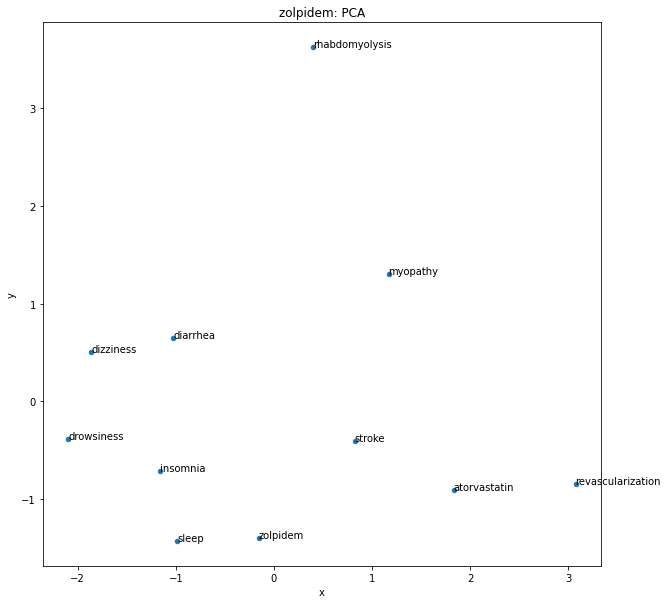

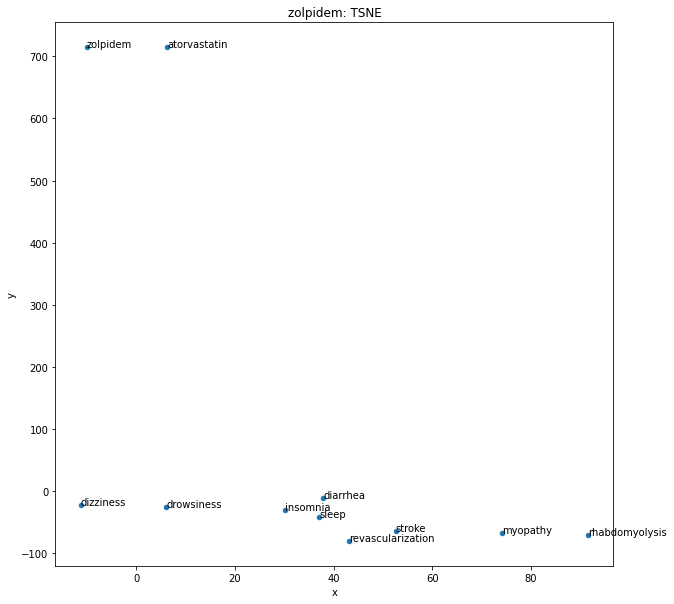

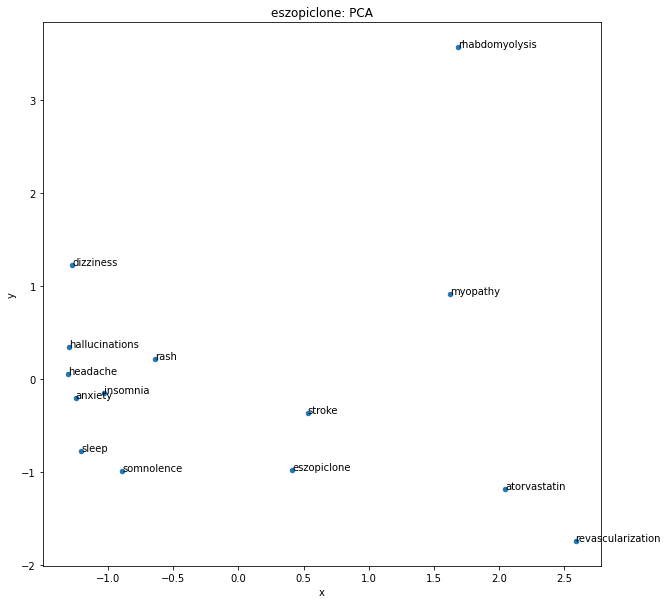

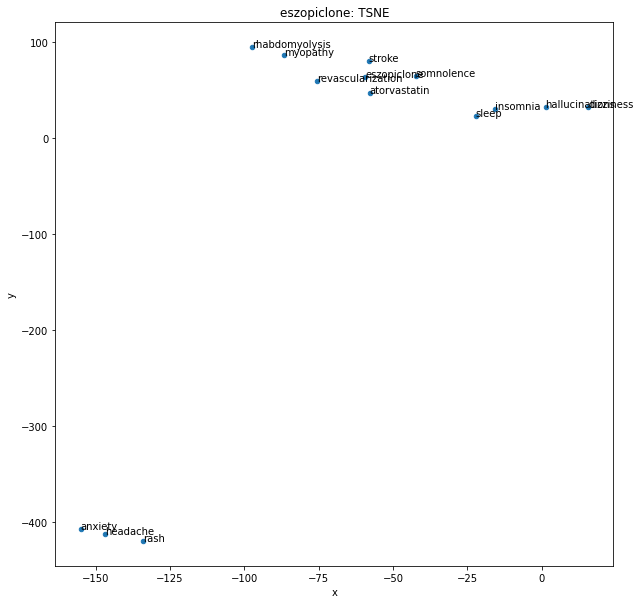

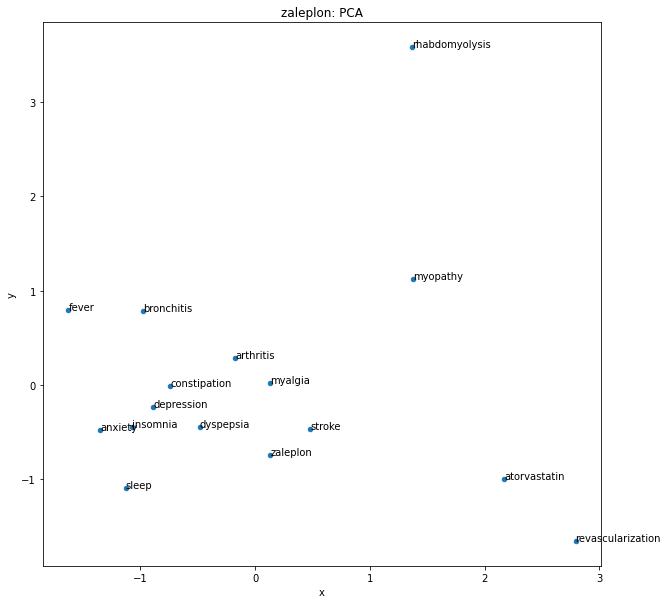

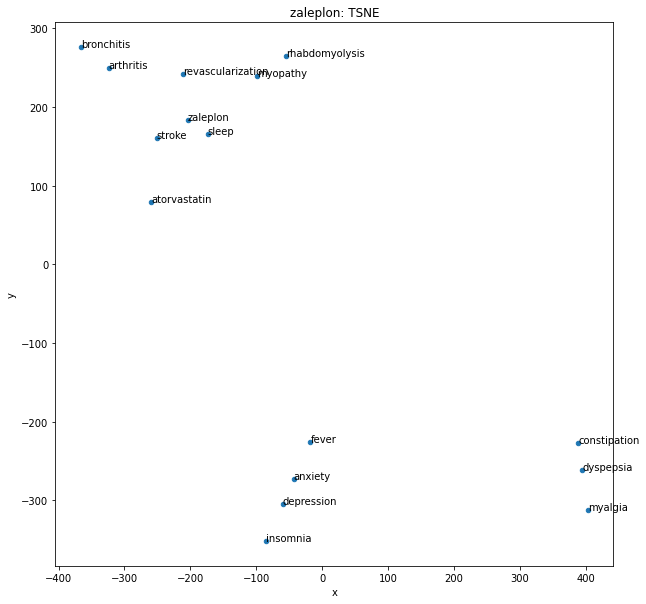

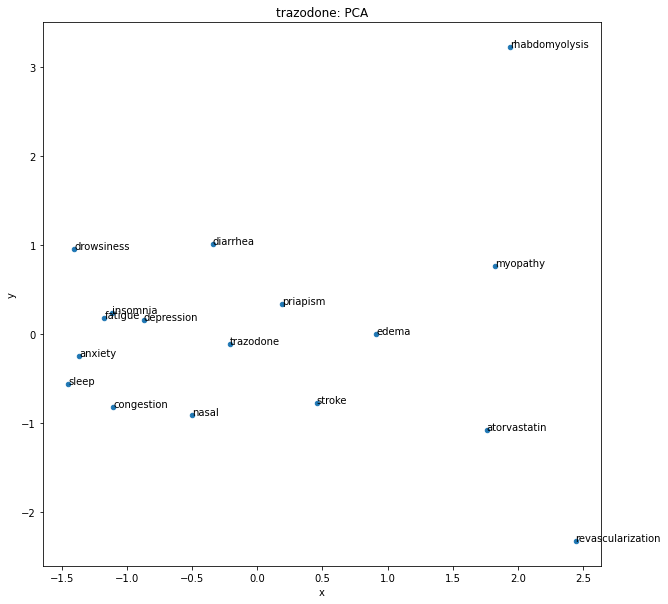

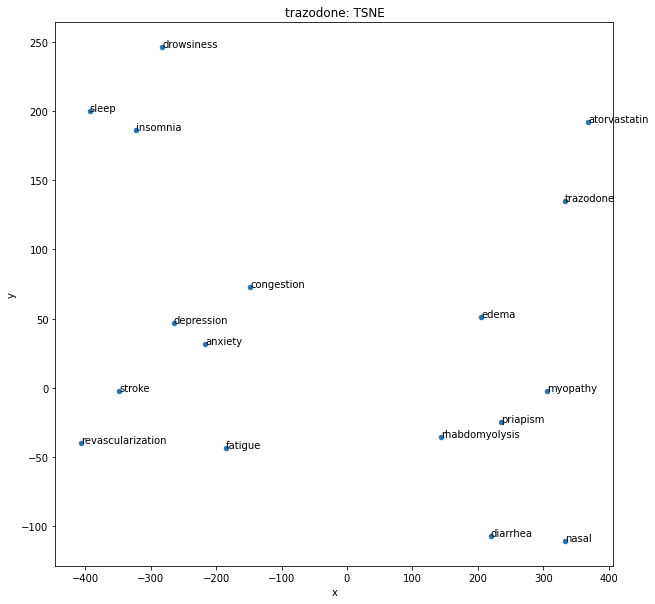

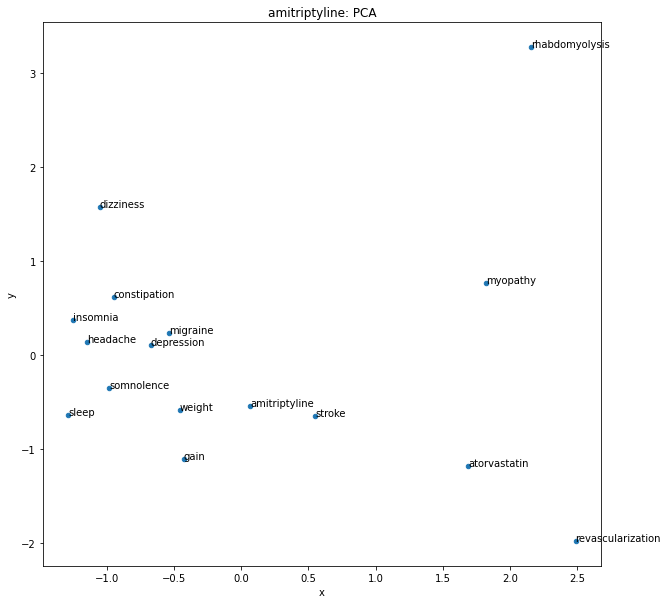

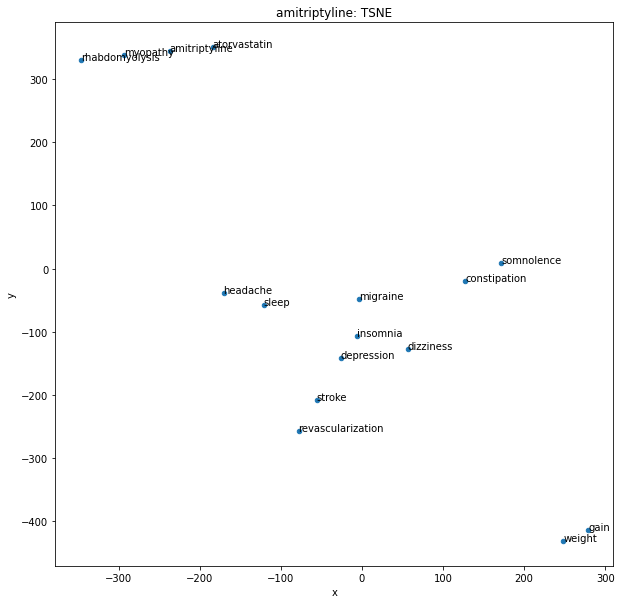

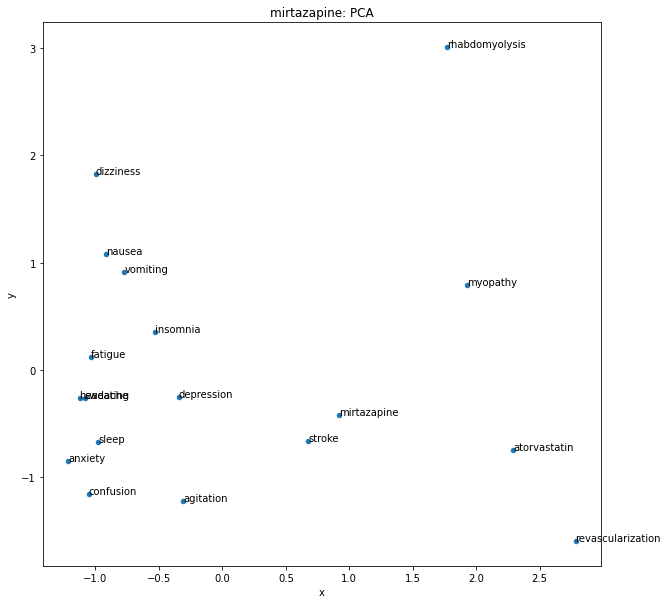

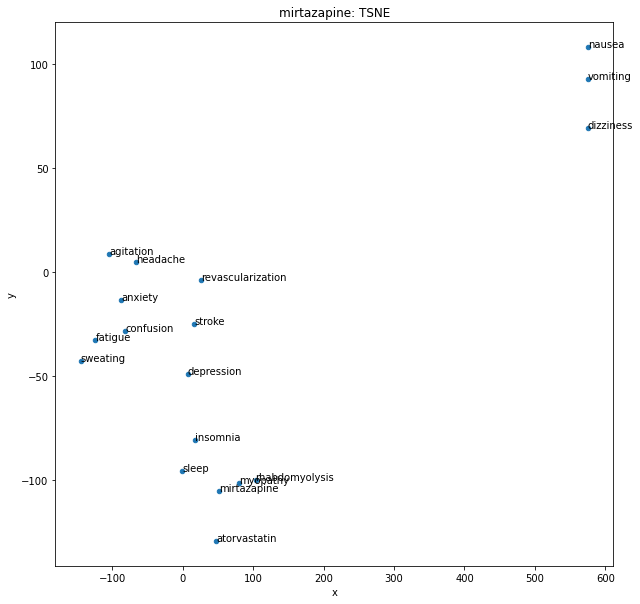

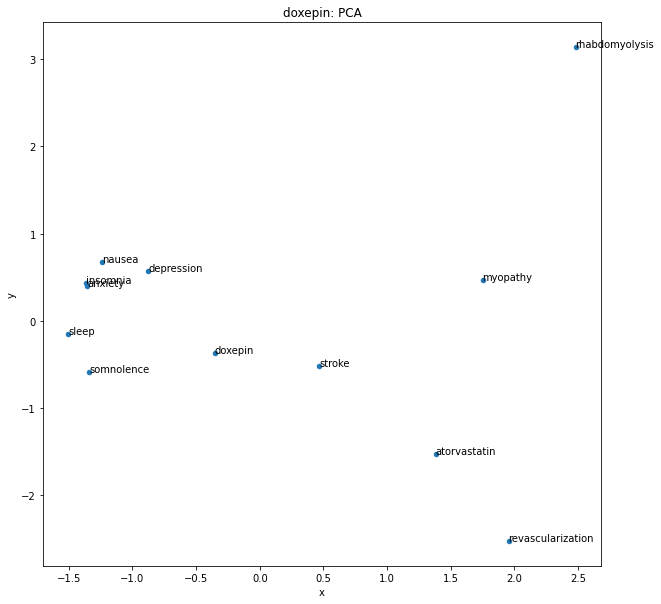

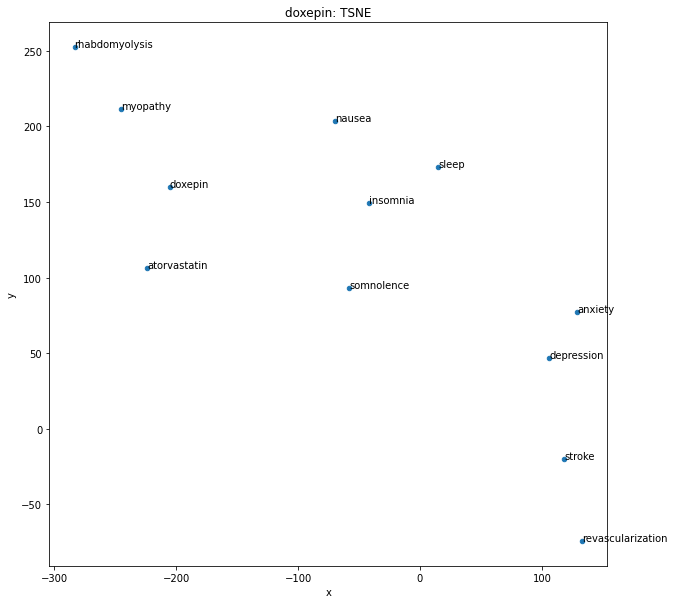

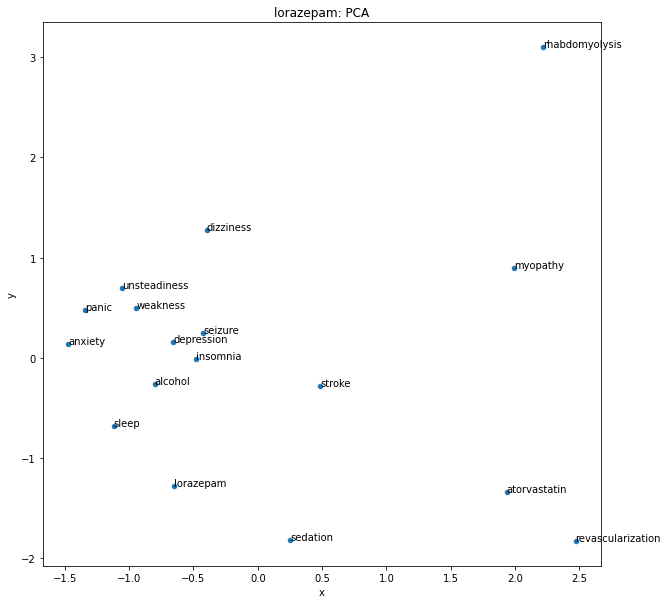

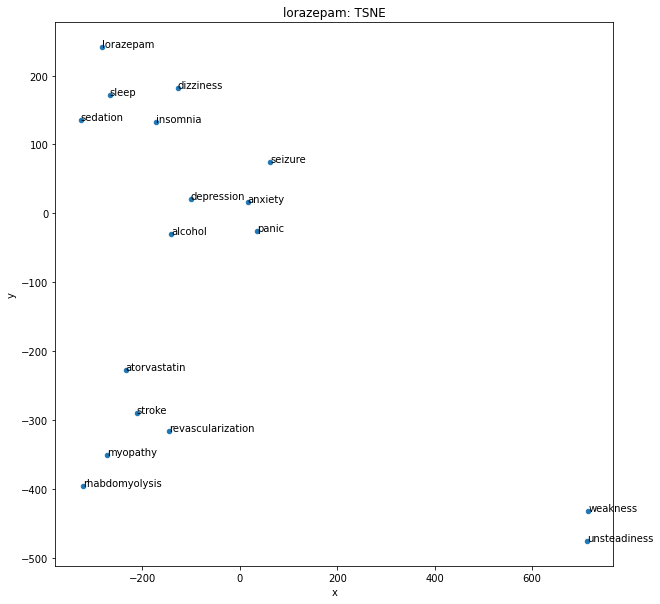

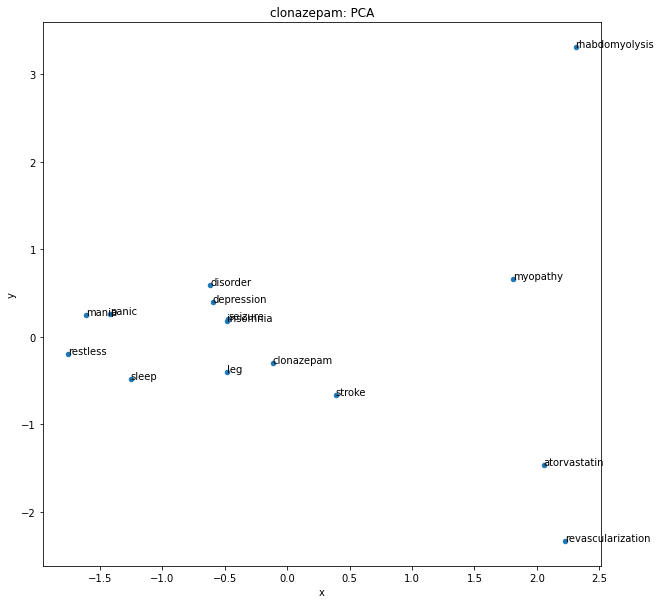

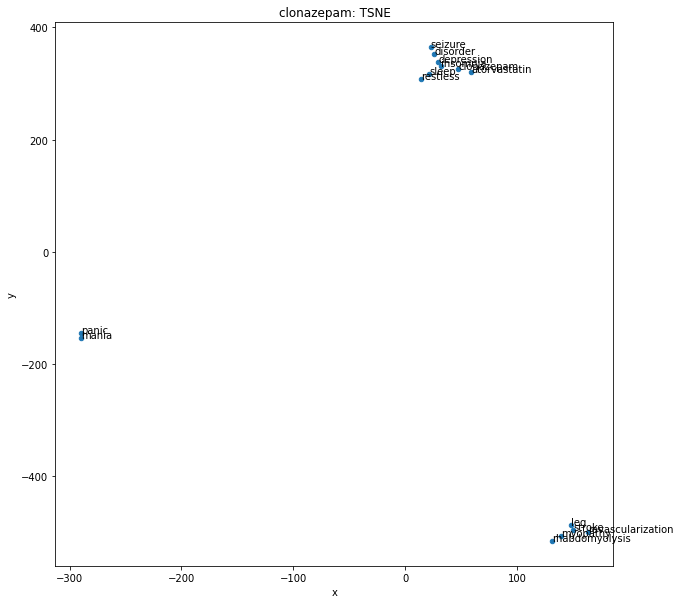

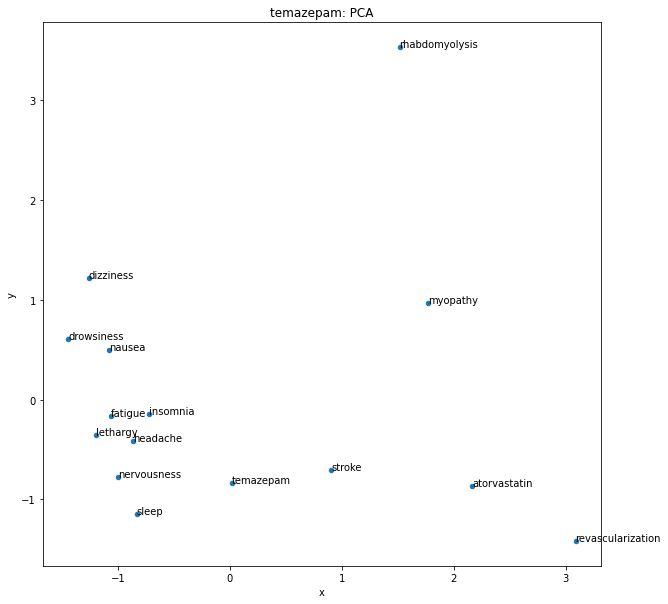

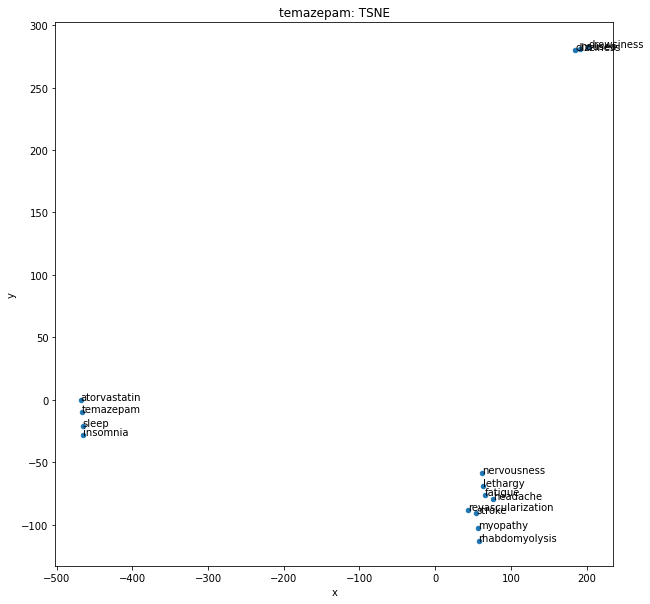

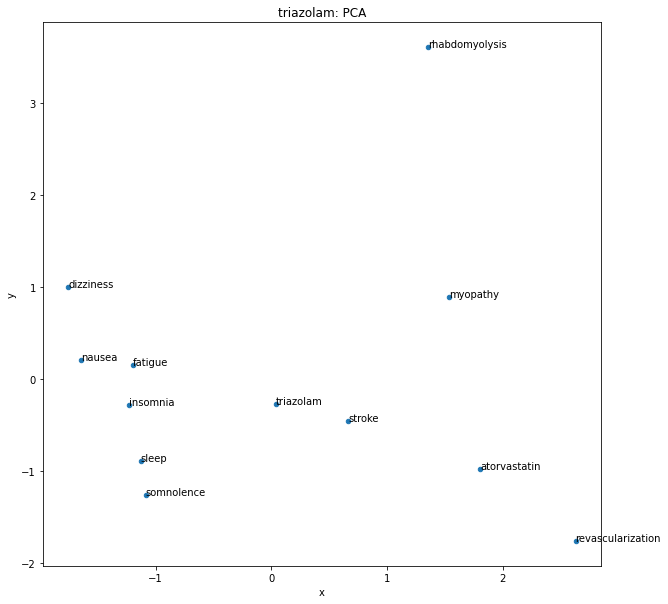

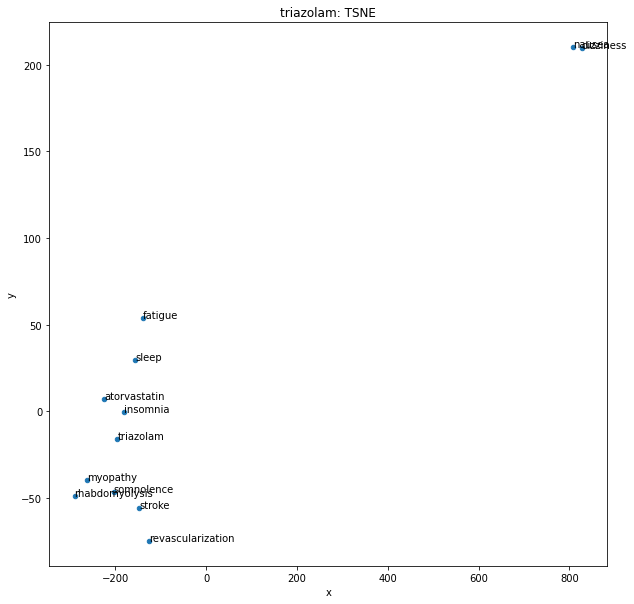

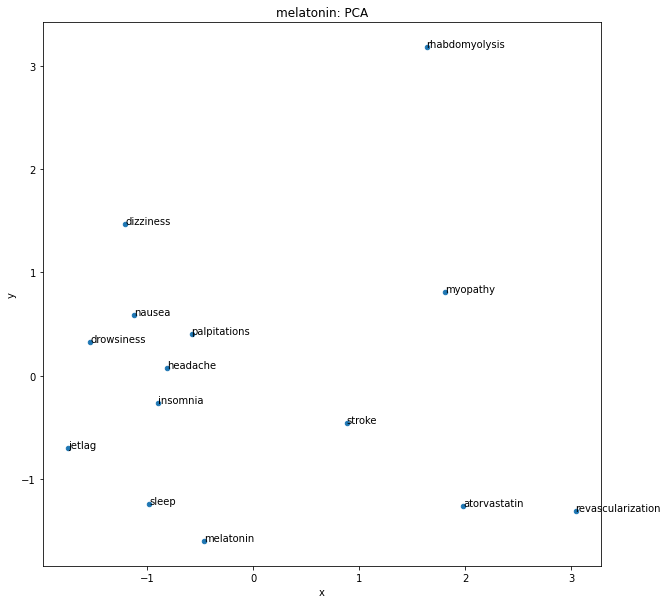

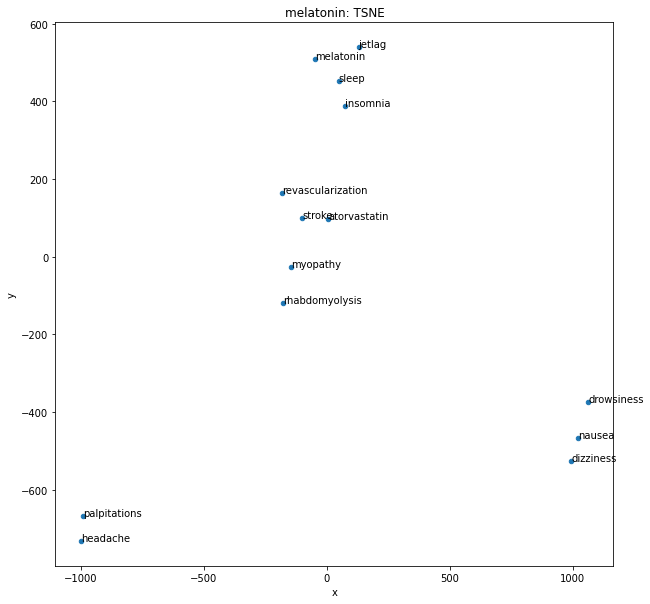

In [ ]:
# sensitivity

new_url = "https://raw.githubusercontent.com/nlei1/csvs-for-proj/main/drugs-side-effects-4.csv"
new_df = pd.read_csv(new_url, header=None, error_bad_lines=False)
insomnia_drug_names2 = new_df[0].tolist()
ind_dct2 = {k: v for v, k in enumerate(insomnia_drug_names2)}

def get_words2(drug_name):
  return [incom for incom in new_df.iloc[ind_dct2[drug_name]] if str(incom) != 'nan']

def plot_with_labels2(drug_name, pca=True, p_perplexity=1, p_n_iter=1000, n_components=2):
  words_lst = get_words2(drug_name)
  embeddings_lst = get_embeddings(words_lst)
  if pca:
    post_reduction = get_pca(embeddings_lst, n_components)
  else:
    post_reduction = get_tsne(embeddings_lst, p_perplexity, p_n_iter, n_components)
  post_reduction_annotated = post_reduction.join(pd.DataFrame(words_lst, columns=['label']))
  title_str = drug_name + (": PCA" if pca else ": TSNE")
  ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10), title=title_str)
  post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

def plot_insomnia_drugs2():
  for drug in insomnia_drug_names2:
    plot_with_labels2(drug)
    plot_with_labels2(drug, False)

plot_insomnia_drugs2()

0     Text(-0.6800728871392288, 0.35085446004485077,...
1     Text(0.010965791934164408, 0.07558251251256459...
2     Text(-0.49171345112085196, -0.1928687509282557...
3     Text(-0.6347147279245967, -0.23272378518730055...
4     Text(-0.20085887810140746, -0.3279323455706275...
5     Text(0.012141569188855774, -0.2929052868457978...
6     Text(-0.44313924430448626, 0.11584818986107712...
7     Text(-1.2725025310627298, -1.0903685311196092,...
8     Text(-1.116197479914528, -1.2708055661408606, ...
9     Text(-1.0286589645006594, -0.3466484377304158,...
10    Text(-0.7617131216105419, -0.5078052421521078,...
11    Text(-0.8636819827990594, 3.6661097807001064, ...
12    Text(2.848175426279641, -0.12377686895983354, ...
13    Text(2.848175426279641, -0.12377686895983354, ...
14    Text(0.43756913482804943, -0.20634693143568744...
15    Text(0.3119843243990818, 0.17303504373084683, ...
16    Text(1.024241595568657, 0.33452862818088436, '...
dtype: object

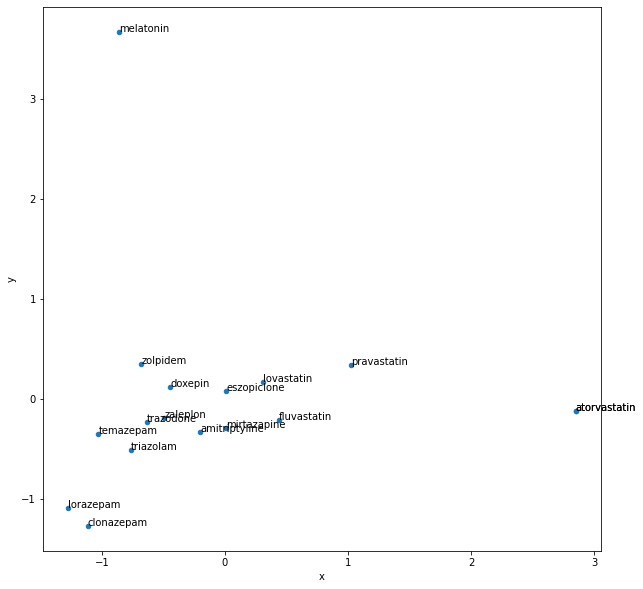

In [ ]:
words_lst = df[0].tolist() + ['atorvastatin', 'fluvastatin', 'lovastatin', 'pravastatin']
embeddings_lst = get_embeddings(words_lst)
post_reduction = get_pca(embeddings_lst, n_components=2)
post_reduction_annotated = post_reduction.join(pd.DataFrame(words_lst, columns=['label']))
ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

0     Text(-337.08306884765625, 237.40060424804688, ...
1     Text(-258.43365478515625, 188.098388671875, 'e...
2     Text(-107.93891143798828, 101.23497772216797, ...
3     Text(478.53179931640625, -1214.336669921875, '...
4     Text(-48.853816986083984, 325.7742919921875, '...
5     Text(-69.5857925415039, 233.2622528076172, 'mi...
6     Text(146.45387268066406, 149.07522583007812, '...
7     Text(-207.37158203125, -13.391698837280273, 'l...
8     Text(3.559335708618164, -4.308054447174072, 'c...
9     Text(-94.34037017822266, -110.86644744873047, ...
10    Text(-103.3017807006836, 28.48813819885254, 't...
11    Text(235.6144561767578, 164.02804565429688, 'm...
12    Text(909.5910034179688, 485.0097961425781, 'at...
13    Text(893.6049194335938, 427.0555725097656, 'at...
14    Text(-458.3607177734375, -253.00697326660156, ...
15    Text(-543.0562744140625, -216.45303344726562, ...
16    Text(-423.1337585449219, -338.4353942871094, '...
dtype: object

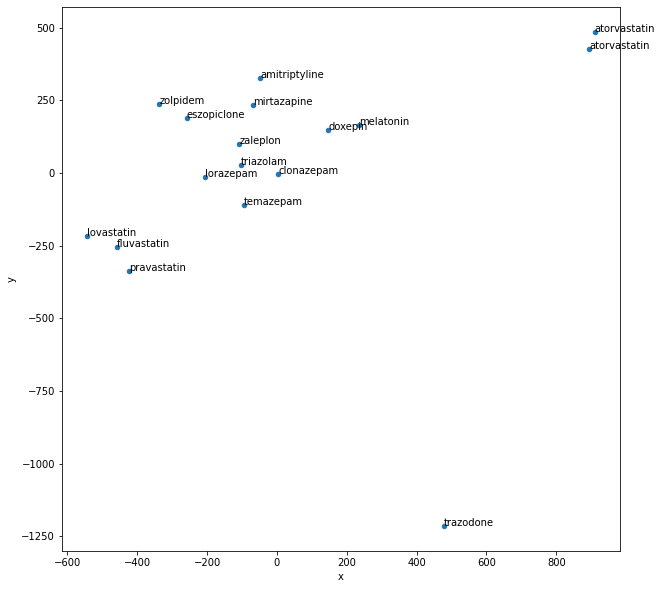

In [ ]:
words_lst = df[0].tolist() + ['atorvastatin', 'fluvastatin', 'lovastatin', 'pravastatin']
embeddings_lst = get_embeddings(words_lst)
post_reduction = get_tsne(embeddings_lst, p_perplexity=1, p_n_iter=1000, n_components=2)
post_reduction_annotated = post_reduction.join(pd.DataFrame(words_lst, columns=['label']))
ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

0     Text(-106.12726593017578, -21.874664306640625,...
1     Text(-87.76558685302734, -3.092346668243408, '...
2     Text(-59.613101959228516, 30.53203582763672, '...
3     Text(-965.908935546875, 107.51033020019531, 't...
4     Text(-118.99816131591797, 59.77269744873047, '...
5     Text(-94.6087875366211, 49.28058624267578, 'mi...
6     Text(-61.093841552734375, 107.63274383544922, ...
7     Text(-26.972721099853516, 58.67191696166992, '...
8     Text(-27.978002548217773, 1.6615947484970093, ...
9     Text(3.2464210987091064, 30.323711395263672, '...
10    Text(-38.875328063964844, 30.451250076293945, ...
11    Text(-61.0557746887207, 132.9602508544922, 'me...
12    Text(661.6929321289062, -88.08090209960938, 'a...
13    Text(661.490966796875, -104.96292114257812, 'a...
14    Text(-18.499982833862305, -84.48204040527344, ...
15    Text(7.4914679527282715, -86.4432144165039, 'l...
16    Text(-37.47821044921875, -102.36922454833984, ...
dtype: object

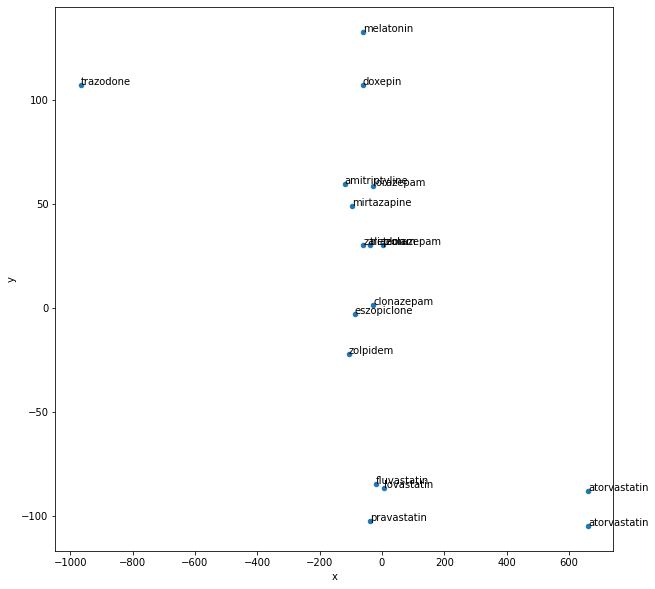

In [11]:
words_lst = df[0].tolist() + ['atorvastatin', 'fluvastatin', 'lovastatin', 'pravastatin']
embeddings_lst = get_embeddings(words_lst)
post_reduction = get_tsne(embeddings_lst, p_perplexity=1, p_n_iter=1000, n_components=2)
post_reduction_annotated = post_reduction.join(pd.DataFrame(words_lst, columns=['label']))
ax = post_reduction_annotated.plot(x='x',y='y',kind='scatter',figsize=(10,10))
post_reduction_annotated[['x','y','label']].apply(lambda x: ax.text(*x),axis=1)

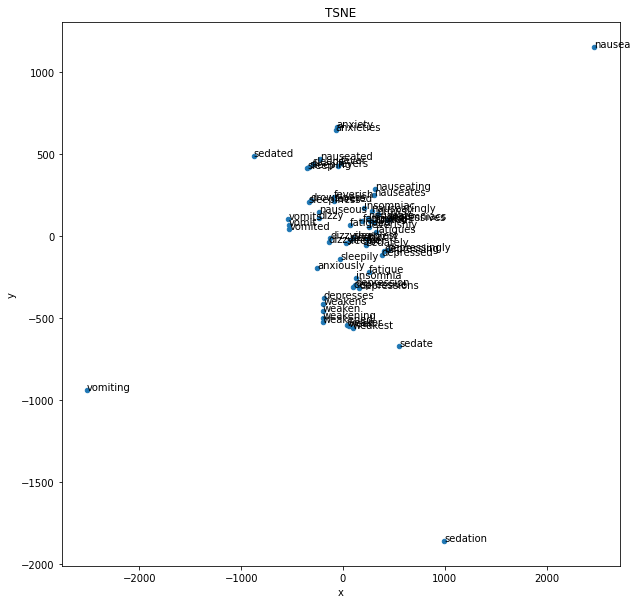

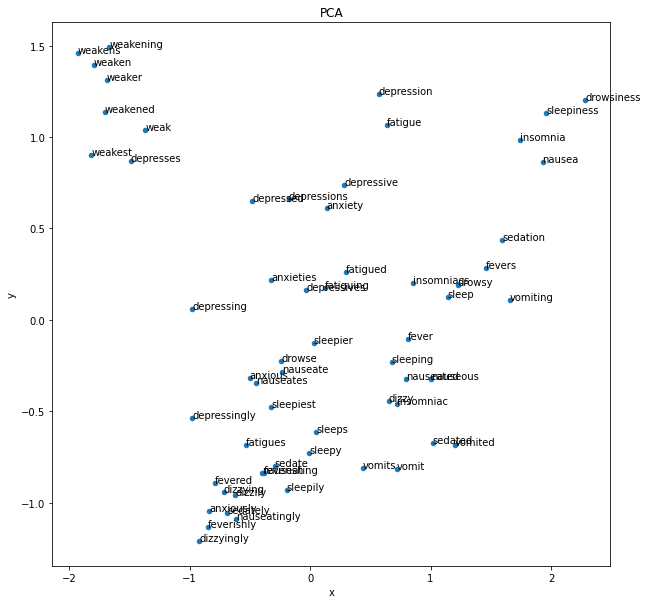

In [14]:
forms_of_words_analysis()